In [ ]:
# 필요한 package load
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option("display.max_columns",None) 
pd.set_option("display.max_rows",None) 

import warnings
warnings.filterwarnings("ignore")

from IPython.display import Image
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import LocalOutlierFactor
sns.set(style = "darkgrid", palette = "pastel", color_codes = True)
sns.set_context('talk')


In [ ]:
!git clone https://github.com/yun-seon/DX-Training-LGES-0708.git

Cloning into 'DX-Training-LGES-0708'...
remote: Enumerating objects: 14, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 14 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (14/14), done.


In [ ]:
# load the dataset
df = pd.read_csv("/content/DX-Training-LGES-0708/Data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


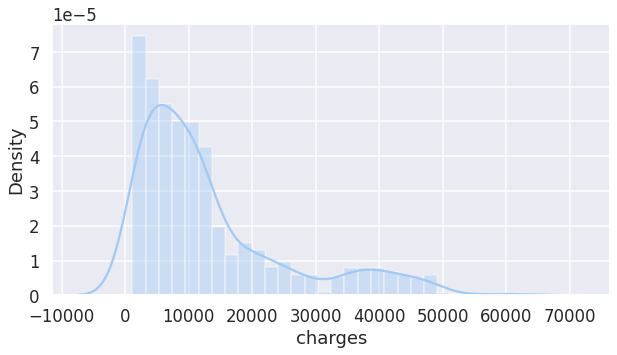

In [ ]:
# 데이터 분포 확인 (반응변수: charges) 
plt.figure(figsize = (10,5))
sns.distplot(df['charges'])
plt.show()

In [ ]:
# zscore를 바탕으로 데이터셋의 결측치 개수 확인 
# zscore의 threshold를 3으로 설정 

def out_zscore(data):
    global outliers, zscore # 변수 정의
    outliers = [] 
    zscore = []
    threshold = 3 # z-score threshold 정의

    mean = np.mean(data) # 데이터의 평균 계산
    std = np.std(data) # 데이터의 표준편차 계산

    for i in data:
        z_score = (i - mean)/std # index 별 z-score 계산
        zscore.append(z_score)
        
        if np.abs(z_score) > threshold: # threshold 기준으로 outlier 값 확인 
            outliers.append(i)
    return print("Total number of outliers are", len(outliers))

In [ ]:
# 7개의 결측치 존재 
out_zscore(df.charges)

Total number of outliers are 7


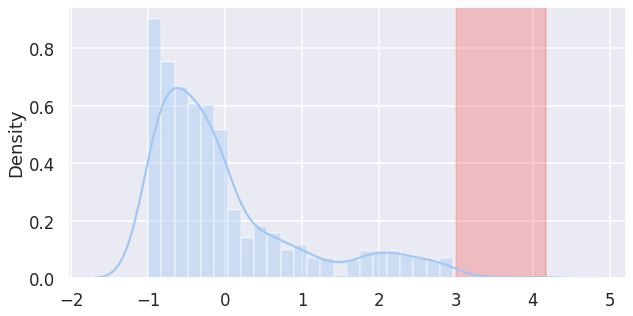

In [ ]:
# 데이터 분포상에 zscore 기준으로 outlier 예상 위치 표시 

plt.figure(figsize = (10,5))
sns.distplot(zscore) # z-socre distribution plot 시각화 
plt.axvspan(xmin = 3, xmax = max(zscore), alpha = 0.2, color = 'red') # 이상치 위치 표시
plt.show()

In [ ]:
# multivariate outlier
# DBSCAN 모델링 

X = df[['age','bmi']].values # features

db = DBSCAN(eps = 3.0, min_samples = 10).fit(X) # 데이터를 dbscan 모델에 적합 
labels = db.labels_ # dbscan에서 임의로 clustering한 label 저장 

In [ ]:
np.unique(labels)

array([-1,  0])

In [ ]:
# 모델링 결과 값 분포 출력 
pd.Series(labels).value_counts()

 0    1312
-1      26
dtype: int64

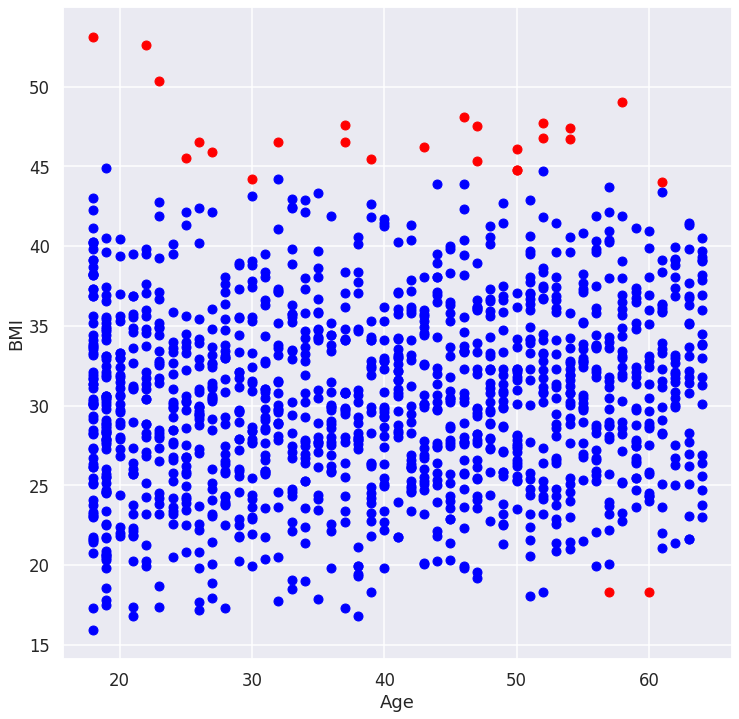

In [ ]:
# outlier 값 (-1) 시각화

plt.figure(figsize = (12, 12))

unique_labels = set(labels)
colors = ['blue', 'red']

# outlier가 'red'로 표시되도록 설정 후 dbscan 모델의 출력 라벨을 기준으로 시각화 

for color, label in zip(colors, unique_labels):
    sample_mask = [True if l == label else False for l in labels]
    plt.plot(X[:,0][sample_mask], X[:, 1][sample_mask], 'o', color = color);

plt.xlabel('Age');
plt.ylabel('BMI');